# <span style="color:blue">Model Development, Model Evaluation and Refinement</span>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

C:\Users\43xqu\AppData\Local\Temp\ipykernel_11824\2281944091.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Câu 1: Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [2]:
url = 'https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv'

In [3]:
df = pd.read_csv(url)
#df = pd.read_csv('Model_Dataset_Lab.csv')

In [4]:
df

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
0,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,13495.0
1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,16500.0
2,2823,152,0.822681,0.909722,154.0,19,26,94.5,2.68,16500.0
3,2337,109,0.848630,0.919444,102.0,24,30,99.8,3.19,13950.0
4,2824,136,0.848630,0.922222,115.0,18,22,99.4,3.19,17450.0
...,...,...,...,...,...,...,...,...,...,...
196,2952,141,0.907256,0.956944,114.0,23,28,109.1,3.78,16845.0
197,3049,141,0.907256,0.955556,160.0,19,25,109.1,3.78,19045.0
198,3012,173,0.907256,0.956944,134.0,18,23,109.1,3.58,21485.0
199,3217,145,0.907256,0.956944,106.0,26,27,109.1,3.01,22470.0


In [5]:
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
199,3217,145,0.907256,0.956944,106.0,26,27,109.1,3.01,22470.0
3,2337,109,0.848630,0.919444,102.0,24,30,99.8,3.19,13950.0
131,2758,121,0.896684,0.923611,110.0,21,28,99.1,3.54,15510.0
103,3139,181,0.857761,0.943056,160.0,19,25,99.2,3.43,18399.0
71,3715,304,0.957232,1.000000,184.0,14,16,112.0,3.80,45400.0
170,2480,110,0.843825,0.923611,73.0,30,33,102.4,3.27,10698.0
173,2458,122,0.843825,0.923611,92.0,27,32,102.4,3.31,11248.0
157,2122,98,0.799135,0.894444,70.0,28,34,95.7,3.19,8358.0
35,2024,92,0.754926,0.887500,76.0,30,34,96.5,2.92,7295.0
166,2679,146,0.846708,0.911111,116.0,24,30,98.4,3.62,11199.0


In [6]:
df.shape

(201, 10)

__Nhận xét:__ Dataset trên có 201 samples và 10 features

## Câu 2. Kiểm tra kiểu dữ liệu của các feature `curb-weight`, `engine-size`, `length`, `width`, `horsepower`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore` trong dataset có bị khuyết giá trị nào không?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  201 non-null    int64  
 1   engine-size  201 non-null    int64  
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   horsepower   201 non-null    float64
 5   city-mpg     201 non-null    int64  
 6   highway-mpg  201 non-null    int64  
 7   wheel-base   201 non-null    float64
 8   bore         201 non-null    float64
 9   price        201 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


In [8]:
print('Tổng số lượng missing value(s): ' + str(sum(df.isnull().sum())))

Tổng số lượng missing value(s): 0


__Nhận xét:__ Dữ liệu này không có missing value

## Câu 3: Phát triển mô hình **Polynomial Regression** bậc 3 để dự đoán giá xe từ biến `'highway-mpg'` (Tên mô hình `poly`).

In [9]:
# X train Poly
poly_features_c3 = PolynomialFeatures(degree=3)
X_train_c3 = df[['highway-mpg']]
X_train_c3_poly = poly_features_c3.fit_transform(X_train_c3)

# Y train
Y_train_c3 = df['price']

__Model:__

In [10]:
p_lr_c3 = LinearRegression()
p_lr_c3.fit(X_train_c3_poly, Y_train_c3)

LinearRegression()

In [11]:
print('Intercept: ', p_lr_c3.intercept_)

Intercept:  137923.59375773993


In [12]:
print('Coefficients: ', p_lr_c3.coef_)

Coefficients:  [ 0.00000000e+00 -8.96543312e+03  2.04754306e+02 -1.55663829e+00]


## Câu 4: Tính MSE và $\mathsf{R^2}$ để đánh giá tập mẫu của mô hình poly bằng phương pháp thủ công. Có thể phát họa **Distribution Plot** để đánh giá mô hình.

__Hàm tính MSE và $\mathsf{R^2}$ thủ công:__

In [13]:
def my_mean_squared_error(actual, predicted):
    sse = 0
    n = len(actual)
    for i in range(n):
        sse += ((actual[i] - predicted[i]) ** 2)
    
    return sse / n

def my_r2_score(actual, predicted, y_mean):
    sse_model = my_mean_squared_error(actual, predicted)
    sse_baseline = my_mean_squared_error(actual, y_mean)
    r2 = 1 - sse_model / sse_baseline
    
    return r2

In [14]:
# Prediction
Y_predicted_c3 = p_lr_c3.predict(X_train_c3_poly)
Y_mean = [Y_train_c3.mean()] * len(Y_train_c3)

In [15]:
mse = my_mean_squared_error(Y_train_c3, Y_predicted_c3)
r_squared = my_r2_score(Y_train_c3, Y_predicted_c3, Y_mean)

In [16]:
print('MSE: ', mse)
print('R-squared: ', r_squared)

MSE:  20474146.426361244
R-squared:  0.6741946663906512


__Distribution Plot:__

C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


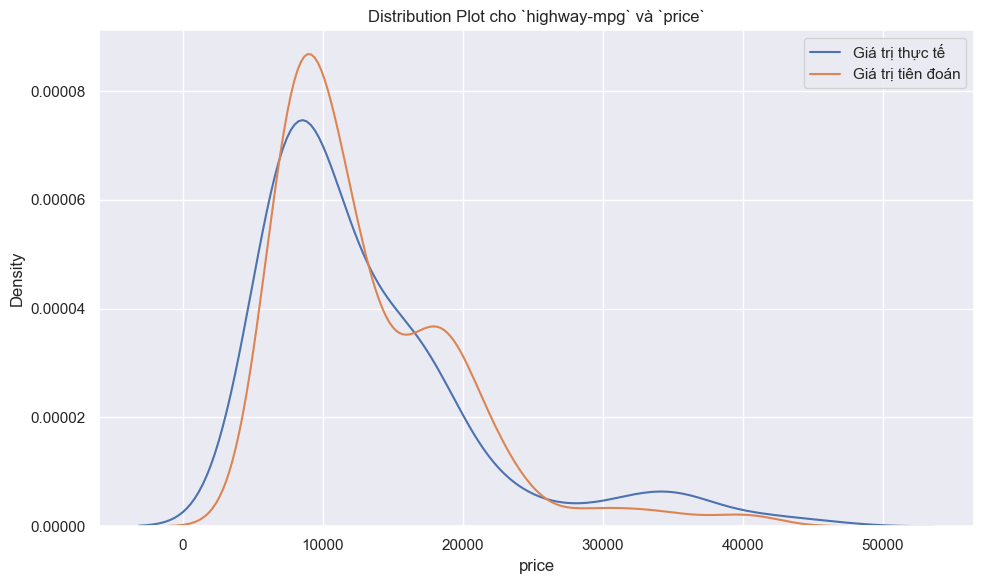

In [17]:
plt.figure(figsize=(10, 6))
sns.distplot(Y_train_c3, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted_c3, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution Plot cho `highway-mpg` và `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show();

## Câu 5: Phát triển mô hình **hồi quy tuyến tính đa biến** để dự đoán `price` từ biến `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`.

In [18]:
X_train_c5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_train_c5 = df['price']

In [19]:
lr_c5 = LinearRegression()
lr_c5.fit(X_train_c5, Y_train_c5)

LinearRegression()

In [20]:
Y_predicted_c5 = lr_c5.predict(X_train_c5)

__Dự đoán:__

In [21]:
i = int(input('Nhập index của `price` cần biết (Từ 0 - 200): '))
print('Với điểm dữ liệu thứ {} có giá trị thực tế là {} ta có mô hình dự đoán được là {}'.format(i, Y_train_c5[i], Y_predicted_c5[i]))

Nhập index của `price` cần biết (Từ 0 - 200):  199


Với điểm dữ liệu thứ 199 có giá trị thực tế là 22470.0 ta có mô hình dự đoán được là 17804.038813428142


## Câu 6: Tính MSE và $\mathsf{R^2}$ để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?

__Tính MSE:__

In [22]:
print("MSE phương pháp thủ công là: ", my_mean_squared_error(Y_train_c5, Y_predicted_c5))
print("MSE phương gọi hàm là: ", mean_squared_error(Y_train_c5, Y_predicted_c5))

MSE phương pháp thủ công là:  11980366.870726487
MSE phương gọi hàm là:  11980366.87072649


__Tính R2:__

In [23]:
Y_mean = [Y_train_c5.mean()] * len(Y_train_c5)
print("R2 phương pháp thủ công là: ", my_r2_score(Y_train_c5, Y_predicted_c5, Y_mean))
print("R2 phương gọi hàm là: ", r2_score(Y_train_c5, Y_predicted_c5))

R2 phương pháp thủ công là:  0.8093562806577457
R2 phương gọi hàm là:  0.8093562806577457


__Distribution Plot:__

C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


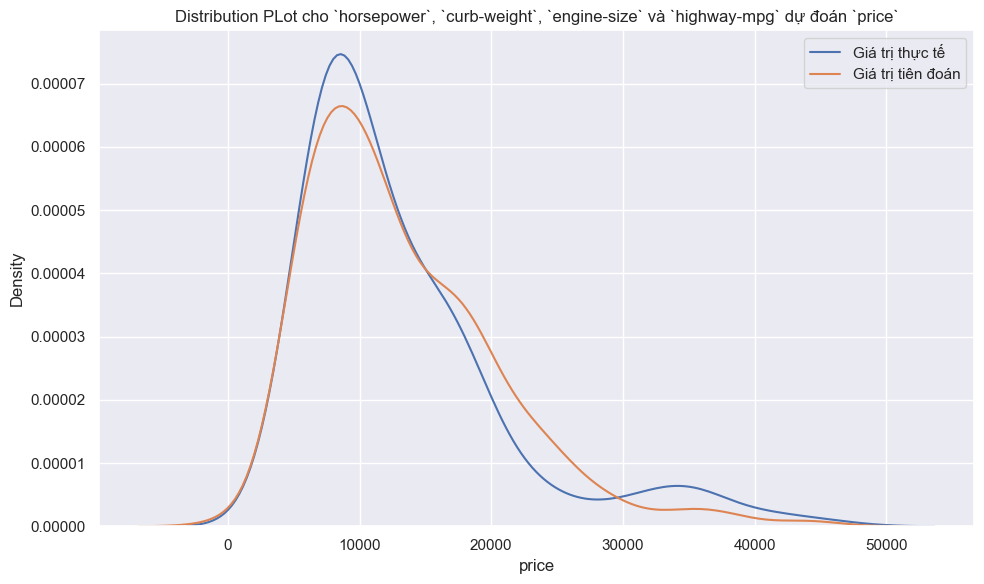

In [24]:
plt.figure(figsize=(10, 6))
sns.distplot(Y_train_c5, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted_c5, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution PLot cho `horsepower`, `curb-weight`, `engine-size` và `highway-mpg` dự đoán `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show();

## Câu 7: Phát triển mô hình **Polynomial Regression bậc 2** để dự đoán giá xe từ biến `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`.

In [25]:
poly_features_c7 = PolynomialFeatures(degree=2)
X_train_c7 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_train_c7_poly = poly_features_c7.fit_transform(X_train_c7)
Y_train_c7 = df['price']

__Model:__

In [26]:
p_lr_c7 = LinearRegression()
p_lr_c7.fit(X_train_c7_poly, Y_train_c7)

LinearRegression()

In [27]:
p_lr_c7.intercept_

-21262.848277172845

In [28]:
p_lr_c7.coef_

array([ 0.00000000e+00,  3.79990747e+02,  9.53081616e+00, -1.06265103e+02,
        1.82168928e+02,  1.69423474e+00, -1.86864385e-01, -1.29043091e+00,
       -2.14860065e+00,  7.57100954e-04,  1.11910005e-01, -1.92007463e-01,
        8.95252693e-02,  4.23869258e-02,  4.66019878e+00])

In [29]:
Y_predicted_c7 = p_lr_c7.predict(X_train_c7_poly)

## Câu 8: Tính MSE và $\mathsf{R^2}$ để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa **Distribution Plot** để đánh giá mô hình được không?

__Tính MSE:__

In [30]:
print("MSE phương pháp thủ công là: ", my_mean_squared_error(Y_train_c7, Y_predicted_c7))
print("MSE phương gọi hàm là: ", mean_squared_error(Y_train_c7, Y_predicted_c7))

MSE phương pháp thủ công là:  9656613.4039896
MSE phương gọi hàm là:  9656613.403989593


__Tính R-squared:__

In [31]:
Y_mean = [Y_train_c7.mean()] * len(Y_train_c7)
print("R2 phương pháp thủ công là: ", my_r2_score(Y_train_c7, Y_predicted_c7, Y_mean))
print("R2 phương gọi hàm là: ", r2_score(Y_train_c7, Y_predicted_c7))

R2 phương pháp thủ công là:  0.8463341969864726
R2 phương gọi hàm là:  0.8463341969864729


__Distribution Plot:__

C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


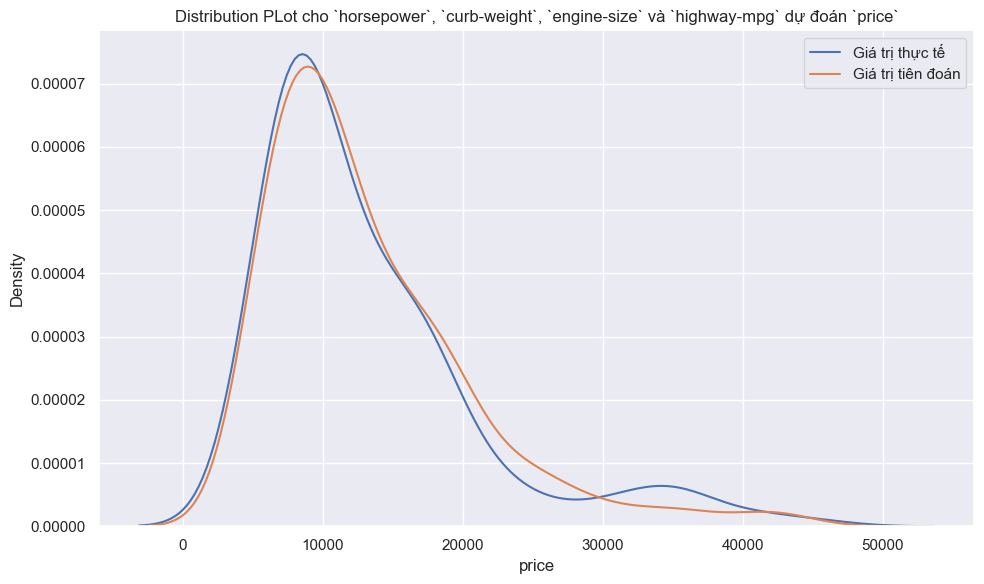

In [32]:
plt.figure(figsize=(10, 6))
sns.distplot(Y_train_c7, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted_c7, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution PLot cho `horsepower`, `curb-weight`, `engine-size` và `highway-mpg` dự đoán `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show();

## Câu 9: Thiết kế một *pipeline* để phát triển mô hình mô hình **Polynomial Regression bậc 2** để dự đoán giá xe từ biến `horsepower`, `curb-weight`, '`engine-size`, `highway-mpg`. Trong *pipeline* thực hiện các công việc sau:
* __Normalize__
* __Transformation $\Rightarrow$ Feature__
* __LinearRegression để Fit tìm mô hình. Xuất mô hình vừa tìm được__

In [33]:
X_train_c9 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_train_c9 = df['price']

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('transform', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())]
)

In [35]:
pipeline.fit(X_train_c9, Y_train_c9)

Pipeline(steps=[('scaler', StandardScaler()),
                ('transform', PolynomialFeatures()),
                ('model', LinearRegression())])

In [36]:
Y_predicted_c9 = pipeline.predict(X_train_c9)

In [37]:
Y_predicted_c9

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

__Score:__

In [38]:
print('Training Set Score: ', pipeline.score(X_train_c9, Y_train_c9))
print('Training MSE: ', mean_squared_error(Y_train_c9, Y_predicted_c9))
print('Training R-Squared: ', r2_score(Y_train_c9, Y_predicted_c9))

Training Set Score:  0.8463341969864728
Training MSE:  9656613.4039896
Training R-Squared:  0.8463341969864728


## Câu 10: Tìm khoảng giá trị chặn của các mô hình.

In [39]:
print('Giá trị Y (`price`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      Y_predicted_c3.min())
print('Giá trị Y (`price`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      Y_predicted_c3.max())

print('Giá trị X (`highway-mpg`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      X_train_c3['highway-mpg'].min())
print('Giá trị X (`highway-mpg`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      X_train_c3['highway-mpg'].max())

Giá trị Y (`price`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  5739.271085754619
Giá trị Y (`price`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  40517.77578569911
Giá trị X (`highway-mpg`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  16
Giá trị X (`highway-mpg`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  54


## Câu 11: Xếp hạng các mô hình đã phát triển các câu trên.

In [40]:
names = [
    'Câu 3',
    'Câu 5',
    'Câu 7',
    'Câu 9'
]
model_names = [
    'Polynomial Linear Regression',
    'Multivariable Linear Regression',
    'Multivariable Linear Regression bậc 2',
    'Multivariable Linear Regression Pipeline bậc 2'
]
used_features = [
    '`highway-mpg`',
    '`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`',
    '`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`',
    '`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`'
]
models = [
    p_lr_c3,
    lr_c5,
    p_lr_c7,
    pipeline
]
mses = [
    mean_squared_error(Y_train_c3, Y_predicted_c3),
    mean_squared_error(Y_train_c5, Y_predicted_c5),
    mean_squared_error(Y_train_c7, Y_predicted_c7),
    mean_squared_error(Y_train_c9, Y_predicted_c9)
]
r2s = [
    r2_score(Y_train_c3, Y_predicted_c3),
    r2_score(Y_train_c5, Y_predicted_c5),
    r2_score(Y_train_c7, Y_predicted_c7),
    r2_score(Y_train_c9, Y_predicted_c9)
]

In [41]:
model_comparison = pd.DataFrame({'Câu': names,
                                 'Tên Model': model_names,
                                 'Các features sử dụng': used_features,
                                 'Model': models,
                                 'MSE': mses,
                                 'R2': r2s})

In [42]:
model_comparison

,Câu,Tên Model,Các features sử dụng,Model,MSE,R2
0,Câu 3,Polynomial Linear Regression,`highway-mpg`,LinearRegression(),2.047415e+07,0.674195
1,Câu 5,Multivariable Linear Regression,"`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`",LinearRegression(),1.198037e+07,0.809356
2,Câu 7,Multivariable Linear Regression bậc 2,"`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`",LinearRegression(),9.656613e+06,0.846334
3,Câu 9,Multivariable Linear Regression Pipeline bậc 2,"`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`","(StandardScaler(), PolynomialFeatures(), LinearRegression())",9.656613e+06,0.846334


## Câu 12: Anh/chị có thể phát triển một mô hình nào khác tốt hơn các mô hình đã phát triển bên trên. Nếu có thì chứng minh mô hình của bạn là tốt hơn?

### a. Trích xuất biến quan trọng.

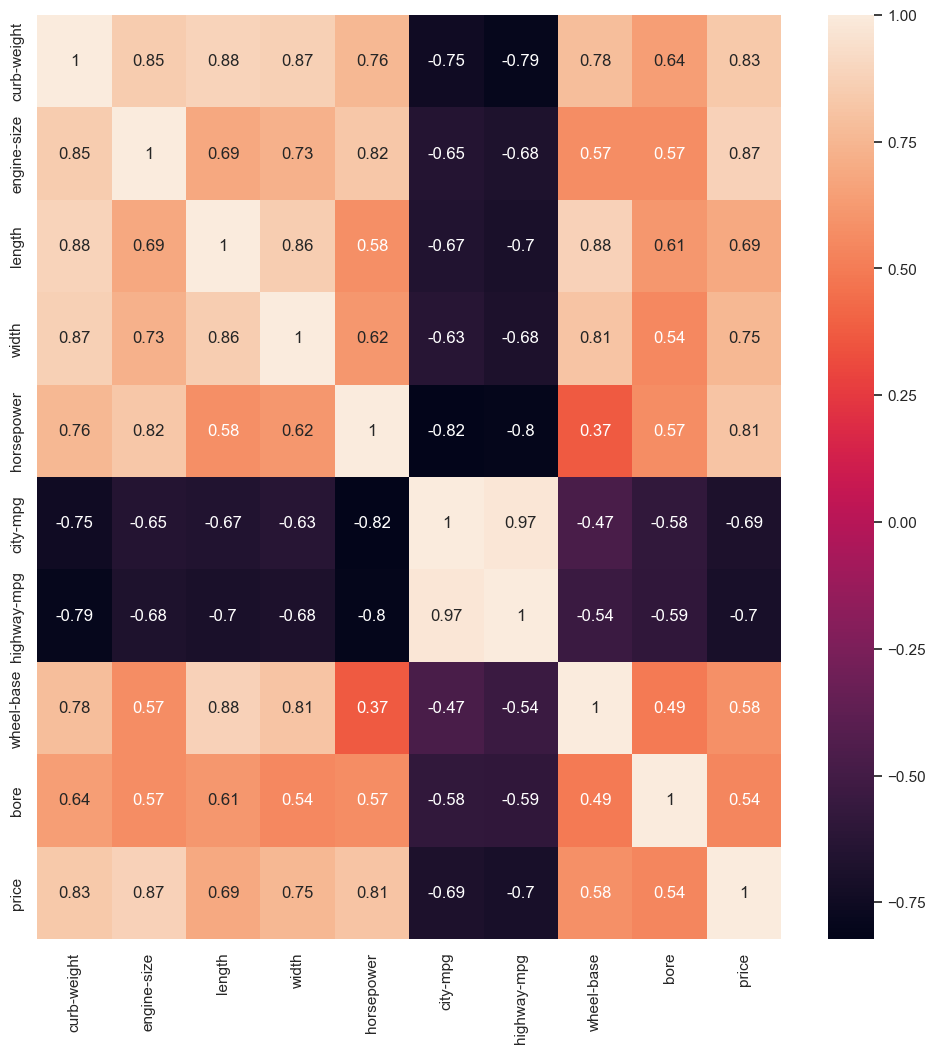

In [43]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show();

__Nhận xét:__ Xét 2 mức tương quan của các biến ở dạng số:
* __Cao (Strong)__ nằm trong đoạn $r \geq 0.8$ hoặc $r \leq -0.8$ gồm: `curb-weight`, `engine-size`, `horsepower`
* __Trung bình (Moderate)__ nằm trong đoạn $0.5 \leq r < 0.8$ hoặc $ -0.5 \leq r < -0.8$ gồm: `length`, `width`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore`
<hr> $\Rightarrow$ Các features được cho là quan trọng nếu các features đó có độ tương quan cao.

In [44]:
important_features_c12 = ['curb-weight', 'engine-size', 'horsepower']

### b. Chọn bậc cho mô hình.

In [45]:
X_train_c12 = df[important_features_c12]
Y_train_c12 = df[['price']]

In [46]:
lr = LinearRegression()

In [47]:
scores_c12 = []
r2s_c12 = []
mses_c12 = []
orders = range(1, 21)
for order in orders:
    pf_ = PolynomialFeatures(degree=order)
    X_train_poly_c12 = pf_.fit_transform(X_train_c12)
    lr.fit(X_train_poly_c12, Y_train_c12)
    scores_c12.append(lr.score(X_train_poly_c12, Y_train_c12))
    r2s_c12.append(r2_score(lr.predict(X_train_poly_c12), Y_train_c12))
    mses_c12.append(mean_squared_error(lr.predict(X_train_poly_c12), Y_train_c12))

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

Text(0.5, 1.0, 'Score với các bậc')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'R-squared')

Text(0.5, 1.0, 'R-squared với các bậc')

Text(0.5, 0, 'Bậc')

Text(0, 0.5, 'R-squared')

Text(0.5, 1.0, 'MSE với các bậc')

Text(0.5, 0, 'Bậc')

Text(0, 0.5, 'MSE')

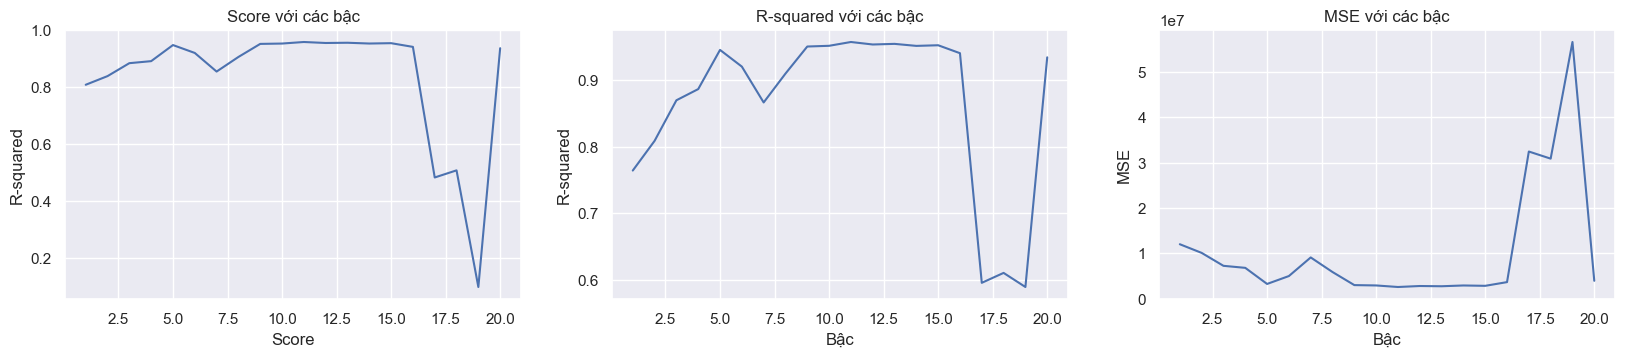

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 3.5))

# Scores
ax1.plot(orders, scores_c12)
ax1.set_title('Score với các bậc')
ax1.set_xlabel('Score')
ax1.set_ylabel('R-squared')

# Scores
ax2.plot(orders, r2s_c12)
ax2.set_title('R-squared với các bậc')
ax2.set_xlabel('Bậc')
ax2.set_ylabel('R-squared')

# Scores
ax3.plot(orders, mses_c12)
ax3.set_title('MSE với các bậc')
ax3.set_xlabel('Bậc')
ax3.set_ylabel('MSE')

__Nhận xét: Như chúng ta có thể thấy bằng mắt thường thì bậc `5` là bậc cho ra kết quả các giá trị `Score`, `R-squared` và `MSE` tốt nhất mà là bậc không quá lớn, vì thế em sẽ chọn bậc `5` để phát triển mô hình ở đây.__

### c. Phát triển mô hình bậc `5` với các biến quan trọng.

In [49]:
X_train_c12 = df[important_features_c12]
Y_train_c12 = df[['price']]

In [50]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('transform', PolynomialFeatures(degree=5)),
    ('model', LinearRegression())]
)

In [51]:
pipeline.fit(X_train_c12, Y_train_c12)

Pipeline(steps=[('scaler', StandardScaler()),
                ('transform', PolynomialFeatures(degree=5)),
                ('model', LinearRegression())])

In [52]:
Y_predicted_c12 = pipeline.predict(X_train_c12)

In [53]:
print('MSE: ', mean_squared_error(Y_train_c12, Y_predicted_c12))
print('R-squared: ', r2_score(Y_train_c12, Y_predicted_c12))

MSE:  3743957.586131841
R-squared:  0.9404223587656677


__Nhận xét: Chúng ta có thể thấy rằng__
* MSE của mô hình này nhỏ hơn tất cả MSE của các mô hình bên trên.
* R-square của mô hình này cao hơn tất cả R-squared của các mô hình bên trên.

## Câu 13. Viết hàm trả về kết quả dự đoán từ một hoặc nhiều features thuộc `curb-weight`, `engine-size`, `length`, `width`, `horsepower`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore`.

In [54]:
features_c13 = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']
features_c13.sort()

In [55]:
def get_all_combinations(lst, n):
    if n == 0:
        return [[]]
    l =[]
    for i in range(0, len(lst)):
        m = lst[i]
        remLst = lst[i + 1:]
        remainlst_combo = get_all_combinations(remLst, n-1)
        for p in remainlst_combo:
             l.append([m, *p])
                
    return l

def train_model(*features):
    X_train = df[features[0]].values
    Y_train = df['price']
    lr = LinearRegression()
    model = lr.fit(X_train, Y_train)
    score = lr.score(X_train, Y_train)
    
    return (model, score)

combs = []
for k in range(1, len(features_c13) + 1):
    comb = get_all_combinations(features_c13, k)
    combs = combs + comb

def all_model(features_list):
    feature_to_model_mapping = dict()
    for comb in combs:
        feature_to_model_mapping[str(comb)] = train_model(comb)
    
    return feature_to_model_mapping

In [56]:
features_to_models = all_model(features_c13)

In [57]:
def input_features(text):
    inp = text.split(' ')
    features = []
    for i in inp:
        if i.isnumeric():
            features = features + [features_c13[int(i)]]
    features.sort()
    return features

In [58]:
def predict__(model, features):
    X_test = df[features]
    Y_predicted = model.predict(X_test)
    
    return Y_predicted

__Thực hiện nhập features và xuất giá trị:__
* Input được nhập vào ở dạng các số cách nhau bởi các khoảng trắng
* Các giá trị được chấp nhận:
    * 0: `bore`
    * 1: `city-mpg`
    * 2: `curb-weight`
    * 3: `engine-size`
    * 4: `highway-mpg`
    * 5: `horsepower`
    * 6: `length`
    * 7: `wheel-base`
    * 8: `width`
* Ví dụ: Nhập vào là `0 1 4` kết quả input sẽ là [`bore`, `city-mpg`, `highway-mpg`]

In [60]:
input_feas = input_features(input('Nhập vào index các features:'))

print('Features bạn đã chọn là: ', input_feas)

model = features_to_models[str(input_feas)][0]
score = features_to_models[str(input_feas)][1]

print('Giá trị Score: ', score)
print('Giá trị Y tiên đoán: \n', predict__(model, input_feas))

Nhập vào index các features: 0 5 1 8 2


Features bạn đã chọn là:  ['bore', 'city-mpg', 'curb-weight', 'horsepower', 'width']
Giá trị Score:  0.7865409744476624
Giá trị Y tiên đoán: 
 [11791.17610169 11791.17610169 19728.98160493 11827.90591386
 15291.09689136 12890.63077142 18657.99967942 19335.85047206
 23225.47030245 10577.75149791 10577.75149791 14580.13598793
 14919.06138425 18032.67327935 24977.90967909 26625.91452603
 29374.04680343   896.43855053  6311.82500898  6527.50480664
  6104.31266888  4945.46495805  8951.70832715  5506.23243196
  5641.80259049  5641.80259049  9339.93196294 10161.11338882
 18357.99623406  6410.01715201  5630.74986249  5349.07136511
  6255.61073496  6354.20721389  6686.97033028  6691.59410265
  9281.44926522  9608.05010168  9700.48430067  8165.62962232
 11816.58265623 11415.18240232  5806.9747844  11965.18741291
 31199.68421418 31199.68421418 40671.9089236   5072.36956874
  5327.13365321  5357.94505288  5604.43625021  5588.83834486
 10135.78868844 10135.78868844 10166.60008811 14543.14998322
 10

C:\Users\43xqu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
